In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

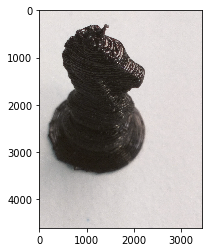

In [5]:
image = cv2.imread('H:\\AR-ExtendingOnlineGames\\actual_images\\knight\\IMG_20181216_113628.jpg') 
plt.imshow(image)

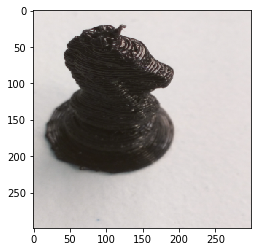

In [6]:
height, width = image.shape[:2]
resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
plt.imshow(resized_image)

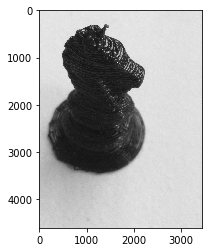

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

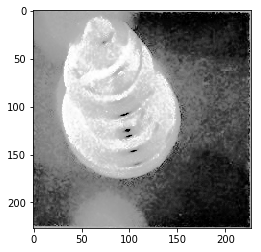

In [5]:
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
equalized_gray = cv2.equalizeHist(gray)
plt.imshow(equalized_gray, cmap='gray_r')

In [2]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

def process_color_image(img_location, gamma = 0.33):
    image = cv2.imread(img_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    #equalized_gray = cv2.equalizeHist(gray)
    #plt.imshow(equalized_gray, cmap='gray')
    #return equalized_gray
    edges = auto_canny(gray, gamma)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(gray, cmap='gray')
    axarr[1,0].imshow(edges, cmap='gray')
    #axarr[1,1].imshow(image_datas[3])
    
    #plt.imshow(edges, cmap='gray')
    
    return edges

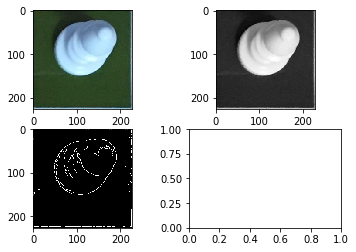

In [41]:
wb = process_color_image("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\wb\\0645_30.jpg")

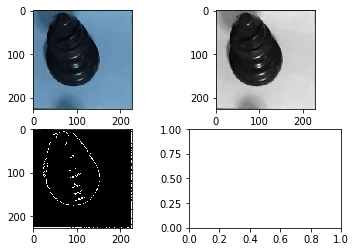

In [42]:
bb = process_color_image("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\bb\\0647_2.jpg")

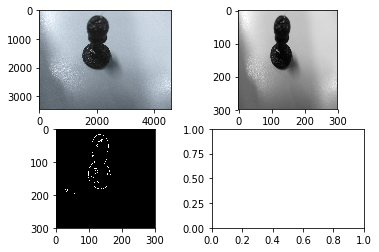

In [3]:
bp_edges = process_color_image("H:\\AR-ExtendingOnlineGames\\actual_images\\pawn\\IMG_20181215_160239.jpg")

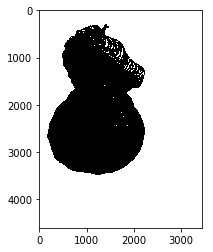

In [9]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [19]:
def perform_edge_detection_and_thresholding(img_location, gamma = 0.33):
    image = cv2.imread(img_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    edges = auto_canny(gray, gamma)
    
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(gray, cmap='gray')
    axarr[1,0].imshow(edges, cmap='gray')
    axarr[1,1].imshow(thresh, cmap='gray')
    
    #plt.imshow(edges, cmap='gray')
    
    return thresh

## Black piece on white

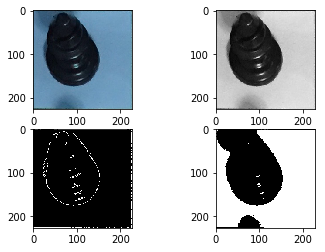

In [28]:
threshbw = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\bb\\0647_2.jpg")

## Black piece on black

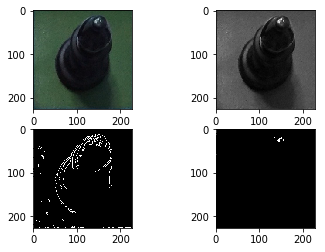

In [37]:
threshbb = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\bb\\0760_5.jpg")

## White piece on black

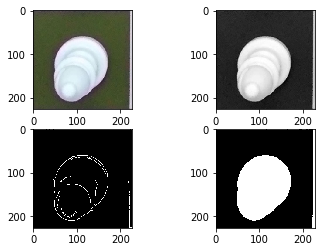

In [30]:
threshwb = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\wb\\0761_58.jpg")

## White piece on white

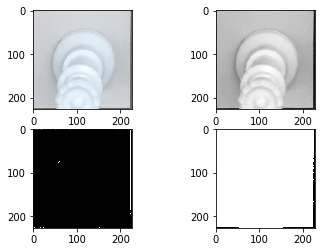

In [31]:
threshww = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\wq\\0977_59.jpg")

In [32]:
threshbb.shape

(227, 227)

In [39]:
np.count_nonzero(threshww)/(threshww.shape[0] * threshww.shape[1])

0.9794678724601681

In [40]:
np.count_nonzero(threshwb)/(threshwb.shape[0] * threshwb.shape[1])

0.30578897319955756

In [41]:
np.count_nonzero(threshbw)/(threshbw.shape[0] * threshbw.shape[1])

0.6062799588581187

In [42]:
def get_piece_and_bg_color(image_location):
    image = cv2.imread(img_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    edges = auto_canny(gray, gamma)
    
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(gray, cmap='gray')
    axarr[1,0].imshow(edges, cmap='gray')
    axarr[1,1].imshow(thresh, cmap='gray')
    
    image_size = thresh.shape[0] * thresh.shape[1]
    non_zero_ratio = np.count_nonzero(thresh)/image_size
    
    piece_color_position_color = {}
    
    if non_zero_ratio < 0.1:
        piece_color_position_color["piece"] = "black"
        piece_color_position_color["position"] = "black"
    elif non_zero_ratio > 0.9:
        piece_color_position_color["piece"] = "white"
        piece_color_position_color["position"] = "white"
    elif non_zero_ratio > 0.5:
        piece_color_position_color["piece"] = "black"
        piece_color_position_color["position"] = "white"
    else:
        piece_color_position_color["piece"] = "white"
        piece_color_position_color["position"] = "black"
        
    return piece_color_position_color
        